In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import losses, optimizers
from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
from sklearn import preprocessing
from sklearn import datasets
from sklearn import model_selection

In [134]:
# Ucitavanje podataka
p = pd.read_csv('flights_small.csv', low_memory=False)

In [135]:
p

,Unnamed: 0,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAY
0,0,2015,1,1,4,EV,5976,N27200,BUF,EWR,...,226.0,0,0,NaN,13.0,0.0,0.0,0.0,213.0,True
1,1,2015,1,1,4,NK,705,N588NK,LGA,FLL,...,97.0,0,0,NaN,97.0,0.0,0.0,0.0,0.0,True
2,2,2015,1,1,4,AA,1287,N3BBAA,MSP,MIA,...,16.0,0,0,NaN,0.0,0.0,16.0,0.0,0.0,True
3,3,2015,1,1,4,F9,110,N206FR,DEN,MSP,...,16.0,0,0,NaN,0.0,0.0,16.0,0.0,0.0,True
4,4,2015,1,1,4,NK,193,N502NK,IAH,LAS,...,29.0,0,0,NaN,29.0,0.0,0.0,0.0,0.0,True
5,5,2015,1,1,4,UA,200,N772UA,GUM,HNL,...,56.0,0,0,NaN,5.0,0.0,51.0,0.0,0.0,True
6,6,2015,1,1,4,OO,5299,N937SW,ORD,MKE,...,80.0,0,0,NaN,0.0,0.0,73.0,7.0,0.0,True
7,7,2015,1,1,4,AA,1053,N4YJAA,DFW,PHL,...,17.0,0,0,NaN,0.0,0.0,17.0,0.0,0.0,True
8,8,2015,1,1,4,EV,2502,N903EV,RAP,DFW,...,62.0,0,0,NaN,33.0,0.0,29.0,0.0,0.0,True
9,9,2015,1,1,4,F9,1070,N227FR,ORD,ATL,...,61.0,0,0,NaN,0.0,0.0,61.0,0.0,0.0,True


In [136]:
p.columns

Index(['Unnamed: 0', 'YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE',
       'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'DELAY'],
      dtype='object')

In [137]:
air_sys_delay = p['AIR_SYSTEM_DELAY']

In [138]:
mis_val_percent = 100 * air_sys_delay.isnull().sum() / len(p) 

In [139]:
mis_val_percent # Procenat NaN vrednosti za parametar AIR_SYSTEM_DELAY

49.561353537655236

In [140]:
# Slicna situacija je i sa ostalim parametrima za delay jer imaju vrednosti samo kad jeste kasnio let
# tako da se te vrednosti ne mogu koristiti za klasifikaciju

# Biramo atribute za klasifikaicju 

In [141]:
x = p[['MONTH', 'DAY', 'DAY_OF_WEEK', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'SCHEDULED_ARRIVAL']]

In [142]:
x

,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,TAXI_OUT,DISTANCE,SCHEDULED_ARRIVAL
0,1,1,4,555,213.0,38.0,282,715
1,1,1,4,640,108.0,19.0,1076,946
2,1,1,4,645,29.0,26.0,1501,1130
3,1,1,4,645,26.0,9.0,680,940
4,1,1,4,700,43.0,14.0,1222,820
5,1,1,4,710,51.0,13.0,3801,1820
6,1,1,4,719,82.0,21.0,67,807
7,1,1,4,720,39.0,14.0,1303,1125
8,1,1,4,725,29.0,34.0,835,1055
9,1,1,4,730,65.0,15.0,606,1020


In [143]:
y = p[['DELAY']]

In [144]:
# Podela podataka na trening i test skup
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.33, random_state = 7)

In [145]:
x_train.shape

(70567, 8)

In [146]:
y_train.shape

(70567, 1)

In [147]:
number_of_features = x_train.shape[1]
output_size = 1

In [148]:
# Pretprocesiranje
scaler = preprocessing.StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [149]:
# Neuronska mreza za klasifikaciju

In [150]:
model = Sequential()

In [151]:
model.add(Dense(units= 50, input_dim = number_of_features, activation = 'relu'))

In [152]:
model.add(Dense(units=40, activation='relu'))

In [153]:
model.add(Dense(units = output_size, activation='sigmoid'))

In [154]:
model.compile(optimizer='adam', loss=losses.binary_crossentropy, metrics=['accuracy'])

In [155]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 50)                450       
_________________________________________________________________
dense_20 (Dense)             (None, 40)                2040      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 41        
Total params: 2,531
Trainable params: 2,531
Non-trainable params: 0
_________________________________________________________________


In [156]:
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True) -> instalirati pydot

In [157]:
# Obucavanje modela
history = model.fit(x_train, y_train, epochs= 30, batch_size=16, verbose=1, validation_split=0.3)

Train on 49396 samples, validate on 21171 samples
Epoch 1/30
49396/49396 [==============================] - 5s 95us/step - loss: 0.2558 - acc: 0.8976 - val_loss: 0.2334 - val_acc: 0.9063
Epoch 2/30
49396/49396 [==============================] - 4s 85us/step - loss: 0.2345 - acc: 0.9062 - val_loss: 0.2353 - val_acc: 0.9049
Epoch 3/30
49396/49396 [==============================] - 4s 87us/step - loss: 0.2330 - acc: 0.9067 - val_loss: 0.2319 - val_acc: 0.9073
Epoch 4/30
49396/49396 [==============================] - 5s 98us/step - loss: 0.2319 - acc: 0.9074 - val_loss: 0.2325 - val_acc: 0.9074
Epoch 5/30
49396/49396 [==============================] - 4s 89us/step - loss: 0.2314 - acc: 0.9079 - val_loss: 0.2336 - val_acc: 0.9064
Epoch 6/30
49396/49396 [==============================] - 4s 74us/step - loss: 0.2309 - acc: 0.9076 - val_loss: 0.2319 - val_acc: 0.9072
Epoch 7/30
49396/49396 [==============================] - 4s 74us/step - loss: 0.2301 - acc: 0.9085 - val_loss: 0.2332 - val_acc

In [158]:
epochs = history.epoch

In [159]:
loss = history.history['loss']
validation_loss = history.history['val_loss']

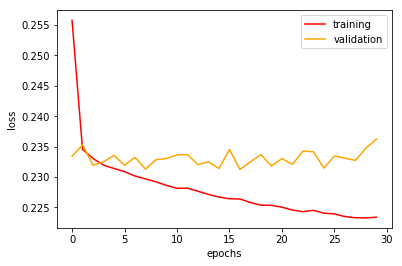

In [160]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(epochs, loss, c='red', label='training')
plt.plot(epochs, validation_loss, c='orange', label='validation')
plt.legend(loc='best')
plt.show()

In [161]:
acc = history.history['acc']
validation_acc = history.history['val_acc']

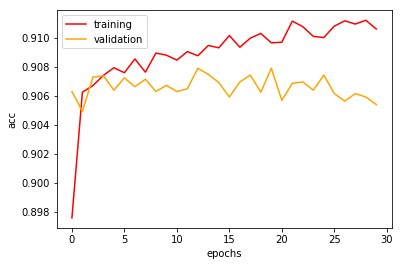

In [162]:
plt.xlabel('epochs')
plt.ylabel('acc')
plt.plot(epochs, acc, c='red', label='training')
plt.plot(epochs, validation_acc, c='orange', label='validation')
plt.legend(loc='best')
plt.show()

In [163]:
# Evaluacija mreze
test_loss, test_acc = model.evaluate(x_test, y_test)
print ("Test loss: {}, test accuracy: {}".format(test_loss, test_acc))

34757/34757 [==============================] - 1s 17us/step
Test loss: 0.2386824641046938, test accuracy: 0.9068389101475962


In [ ]:
# Doslo je do preprilagodjavanja, vidimo da su nam rezultati za validacioni skup znatno losiji od trening skupa
# Broj epoha - 4

In [164]:
model = Sequential()

In [165]:
model.add(Dense(units= 50, input_dim = number_of_features, activation = 'relu'))

In [166]:
model.add(Dense(units=40, activation='relu'))

In [167]:
model.add(Dense(units = output_size, activation='sigmoid'))

In [168]:
model.compile(optimizer='adam', loss=losses.binary_crossentropy, metrics=['accuracy'])

In [169]:
history = model.fit(x_train, y_train, epochs= 4, batch_size=16, verbose=1, validation_split=0.3)

Train on 49396 samples, validate on 21171 samples
Epoch 1/4
49396/49396 [==============================] - 6s 113us/step - loss: 0.2563 - acc: 0.8973 - val_loss: 0.2337 - val_acc: 0.9072
Epoch 2/4
49396/49396 [==============================] - 5s 103us/step - loss: 0.2344 - acc: 0.9073 - val_loss: 0.2325 - val_acc: 0.9069
Epoch 3/4
49396/49396 [==============================] - 5s 91us/step - loss: 0.2331 - acc: 0.9072 - val_loss: 0.2329 - val_acc: 0.9072
Epoch 4/4
49396/49396 [==============================] - 5s 95us/step - loss: 0.2320 - acc: 0.9081 - val_loss: 0.2327 - val_acc: 0.9065


In [170]:
epochs = history.epoch
loss = history.history['loss']
validation_loss = history.history['val_loss']

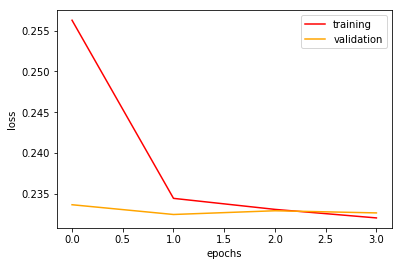

In [171]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(epochs, loss, c='red', label='training')
plt.plot(epochs, validation_loss, c='orange', label='validation')
plt.legend(loc='best')
plt.show()

In [172]:
acc = history.history['acc']
validation_acc = history.history['val_acc']

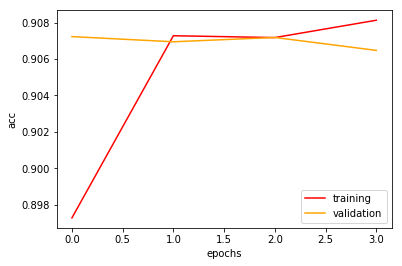

In [173]:
plt.xlabel('epochs')
plt.ylabel('acc')
plt.plot(epochs, acc, c='red', label='training')
plt.plot(epochs, validation_acc, c='orange', label='validation')
plt.legend(loc='best')
plt.show()

In [174]:
# Evaluacija mreze
test_loss, test_acc = model.evaluate(x_test, y_test)
print ("Test loss: {}, test accuracy: {}".format(test_loss, test_acc))

34757/34757 [==============================] - 1s 19us/step
Test loss: 0.23546400647287274, test accuracy: 0.9087378082112956


In [ ]:
# Neuronska mreza za regresiju

In [175]:
x = p[['MONTH', 'DAY', 'DAY_OF_WEEK', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'SCHEDULED_ARRIVAL']]
y = p[['ARRIVAL_DELAY']]

In [176]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.33, random_state = 7)

In [177]:
scaler = preprocessing.StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [178]:
model2 = Sequential()

In [179]:
model2.add(Dense(units = 100, input_dim = number_of_features, activation = 'relu'))

In [180]:
model2.add(Dense(units = output_size))

In [181]:
model2.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [182]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 100)               900       
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 101       
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
_________________________________________________________________


In [184]:
history2 = model2.fit(x_train, y_train, epochs= 30, batch_size=16, verbose=1, validation_split=0.3)

Train on 49396 samples, validate on 21171 samples
Epoch 1/30
49396/49396 [==============================] - 4s 73us/step - loss: 157.4726 - acc: 0.0423 - val_loss: 149.2674 - val_acc: 0.0401
Epoch 2/30
49396/49396 [==============================] - 4s 73us/step - loss: 156.9991 - acc: 0.0430 - val_loss: 151.9145 - val_acc: 0.0418
Epoch 3/30
49396/49396 [==============================] - 4s 74us/step - loss: 156.9506 - acc: 0.0425 - val_loss: 150.2017 - val_acc: 0.0410
Epoch 4/30
49396/49396 [==============================] - 4s 74us/step - loss: 156.7560 - acc: 0.0420 - val_loss: 150.2120 - val_acc: 0.0424
Epoch 5/30
49396/49396 [==============================] - 4s 75us/step - loss: 156.6681 - acc: 0.0422 - val_loss: 148.3365 - val_acc: 0.0456
Epoch 6/30
49396/49396 [==============================] - 4s 73us/step - loss: 156.5507 - acc: 0.0433 - val_loss: 148.7234 - val_acc: 0.0415
Epoch 7/30
49396/49396 [==============================] - 4s 74us/step - loss: 156.5093 - acc: 0.0441 - 

In [98]:
# Previse los model, premala preciznost